<a href="https://colab.research.google.com/github/kanarhy15177/Tugas-3-Deep-Learning/blob/main/klasifikasi_dataset_multilabel_lip_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [3]:
from google.colab import files
upload=files.upload()

Saving kaggle.json to kaggle.json


In [4]:
import os
os.environ["KAGGLE_USERNAME"] = "kanarahayu" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "c/content/kaggle.json" # Ganti dengan key yang ada di kaggle.json

In [9]:
!kaggle datasets download -d  kanarahayu/klasifikasi-dataset-multilabel-lip-product

Dataset URL: https://www.kaggle.com/datasets/kanarahayu/klasifikasi-dataset-multilabel-lip-product
License(s): CC0-1.0


In [10]:
# prompt: unzip file klasifikasi-dataset-multilabel-lip-product.zip

!unzip klasifikasi-dataset-multilabel-lip-product.zip

Archive:  klasifikasi-dataset-multilabel-lip-product.zip
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225001.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225002.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225003.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225004.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225005.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225006.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225007.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225008.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225009.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225010.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225011.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225012.jpg  
  inflating: DatasetMultilabe_Kana Rahayu_202255202007/Kr20225013.jpg  
  infla

In [11]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/traindataset_Kana Rahayu_202255202007.csv', sep=';')
print(df.head())     # mencetak 8 baris secara acak
print(df.columns)

print(df.iloc[7])

  Id,Jenis Lip Product,Lip stik O Two O,Lip Velvet O two O,Lip cream Wardah,Lip Gloss implora,Glossy Stain Emina,Lip cream Hanasui,Lip butter Emina
0  Kr20225001,"Glossy stain,lip stik,lip cream Em...                                                                                               
1  Kr20225002,"Glossy stain,lip stik,lip cream Em...                                                                                               
2  Kr20225003,"Glossy stain,lip stik,lip cream Em...                                                                                               
3  Kr20225004,"Glossy stain,lip stik,lip cream Em...                                                                                               
4  Kr20225005,"lip cream Hanasui,Lip Gloss implor...                                                                                               
Index(['Id,Jenis Lip Product,Lip stik O Two O,Lip Velvet O two O,Lip cream Wardah,Lip Gloss implora,Glossy Stain

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tqdm import tqdm
import pandas as pd

# Baca file CSV dengan benar
df = pd.read_csv('/content/traindataset_Kana Rahayu_202255202007.csv', sep=',', encoding='utf-8')  # Ganti path sesuai

# Periksa apakah kolom 'Id' sudah ada
print(df.columns.tolist())
print(df.head())

SIZE = 200
X_dataset = []
image_directory = '/content/DatasetMultilabe_Kana Rahayu_202255202007/'

for i in tqdm(range(df.shape[0])):
    filename = df['Id'][i]  # pastikan kolomnya sekarang benar
    img_path = image_directory + filename + '.jpg'
    img = image.load_img(img_path, target_size=(SIZE, SIZE))
    img = image.img_to_array(img)
    img = img / 255.0
    X_dataset.append(img)

X = np.array(X_dataset)


['Id', 'Jenis Lip Product', 'Lip stik O Two O', 'Lip Velvet O two O', 'Lip cream Wardah', 'Lip Gloss implora', 'Glossy Stain Emina', 'Lip cream Hanasui', 'Lip butter Emina']
           Id                                  Jenis Lip Product  \
0  Kr20225001   Glossy stain,lip stik,lip cream Emina,lip butter   
1  Kr20225002   Glossy stain,lip stik,lip cream Emina,lip butter   
2  Kr20225003   Glossy stain,lip stik,lip cream Emina,lip butter   
3  Kr20225004   Glossy stain,lip stik,lip cream Emina,lip butter   
4  Kr20225005  lip cream Hanasui,Lip Gloss implora,lip stik, ...   

   Lip stik O Two O  Lip Velvet O two O  Lip cream Wardah  Lip Gloss implora  \
0                 1                   0                 1                  0   
1                 1                   0                 1                  0   
2                 1                   0                 1                  0   
3                 1                   0                 1                  0   
4                

100%|██████████| 300/300 [00:35<00:00,  8.37it/s]


In [29]:
#
print(df['Id'][7])  #lip cream Hanasui,Glossy stain, lip Velvet,lip stik

Kr20225008


In [30]:
print(df['Jenis Lip Product'][7])  #Tagged as multiple lip product.

lip cream Hanasui,Glossy stain, lip Velvet,lip stik


In [31]:
#Id and jenis telur are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['Id', 'Jenis Lip Product'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)


In [32]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid')) # Changed the output layer to 5 units


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,477 (2.68 MB)

 Trainable params: 701,125 (2.67 MB)

 Non-trainable params: 352 (1.38 KB)

In [33]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='sigmoid'))  # <--- Perhatikan ini

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4924 - loss: 7.1244 - val_accuracy: 0.0778 - val_loss: 5.5661
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.0734 - loss: 4.3837 - val_accuracy: 0.7889 - val_loss: 2.1471
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8102 - loss: 1.4729 - val_accuracy: 0.7889 - val_loss: 0.9722
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7984 - loss: 0.6976 - val_accuracy: 0.4667 - val_loss: 0.5428
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2758 - loss: 0.3518 - val_accuracy: 0.0778 - val_loss: 0.3994
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2434 - loss: 0.2592 - val_accuracy: 0.4444 - val_loss: 0.3950
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3359 - loss: 0.2311 - val_accuracy: 0.0778 - val_loss: 0.3966
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2037 - loss: 0.1793 - val_accuracy: 0.4556 - val_loss: 0.3741
Epoch 9/50

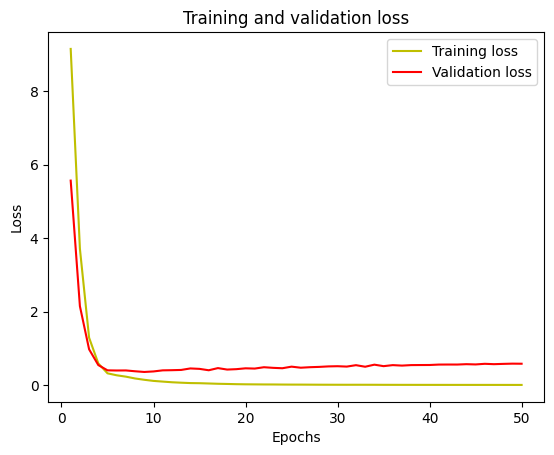

In [37]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

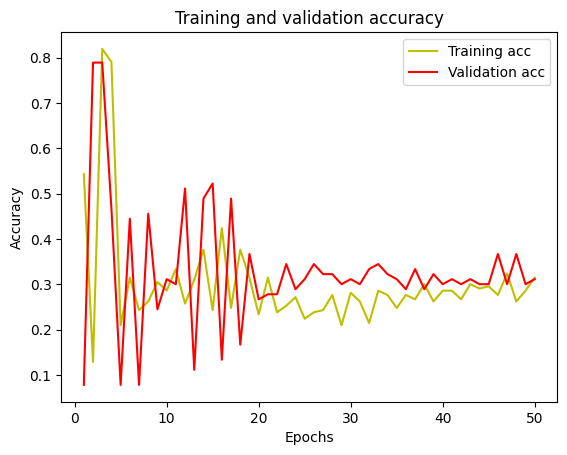

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


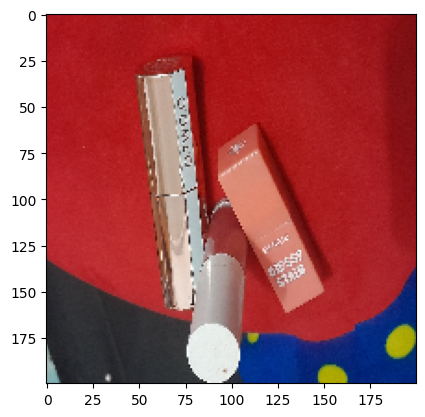

In [39]:
#Validate on an image
#img = image.load_img('/content/DatasetMultilabe_Kana Rahayu_202255202007/Kr20225130.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/DatasetMultilabe_Kana Rahayu_202255202007'
img = image.load_img('/content/DatasetMultilabe_Kana Rahayu_202255202007/Kr20225130.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [41]:
#Print classes and corresponding probabilities
for i in range(len(classes)): # Changed loop range to the length of classes
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Glossy Stain Emina (1.0)
Lip stik O Two O (1.0)
Lip cream Wardah (1.0)
Lip Gloss implora (1.72e-07)
Lip Velvet O two O (2.54e-08)
Lip butter Emina (1.29e-08)
Lip cream Hanasui (1.55e-09)


In [42]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.3040 - loss: 0.5607
Accuracy =  31.111112236976624 %


In [43]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step
                    precision    recall  f1-score   support

  Lip stik O Two O       0.87      0.96      0.91        71
Lip Velvet O two O       0.78      0.54      0.64        39
  Lip cream Wardah       0.74      0.77      0.75        64
 Lip Gloss implora       0.00      0.00      0.00         4
Glossy Stain Emina       0.89      0.96      0.92        73
 Lip cream Hanasui       0.50      0.17      0.25        12
  Lip butter Emina       0.00      0.00      0.00         4

         micro avg       0.83      0.79      0.81       267
         macro avg       0.54      0.48      0.50       267
      weighted avg       0.79      0.79      0.78       267
       samples avg       0.79      0.78      0.76       267

Confusion Matrix for Lip stik O Two O:
[[ 9 10]
 [ 3 68]]
Confusion Matrix for Lip Velvet O two O:
[[45  6]
 [18 21]]
Confusion Matrix for Lip cream Wardah:
[[ 9 17]
 [15 49]]
Confusion Matrix for Lip Gloss implora:
[[86  0]
 [ 4  0]]
Con

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
